# Asignatura: Ciencia de los Datos en las Organizaciones

### Unidad 3

#### Nombre del Profesor: Rodriguez Rivas Jose Gabriel.

#### Nombre del Alumno: Cesar Rivas Fraire.

#### Numero de Control: 20040397.

#### Proyecto Final Unidad 3


## Exploracion de Datos #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv")
covid.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 37762: invalid continuation byte

In [3]:
covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv",  encoding="ISO-8859-1")
covid.head()

C:\Users\csrrf\AppData\Local\Temp\ipykernel_11932\3094307765.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv",  encoding="ISO-8859-1")


,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,Hombre,Zacatecas,Hospitalizado,07/01/2020,04/01/2020,9999-99-99,No,...,No,No,Si,Si,No,No,Si,No,Negativo,No
1,24,2,4,Mujer,Zacatecas,Hospitalizado,05/01/2020,04/01/2020,9999-99-99,No,...,No,No,No,Si,No,No,No,Si,Negativo,No
2,04b7a5,2,4,Mujer,Zacatecas,Hospitalizado,12/01/2020,06/01/2020,9999-99-99,No,...,No,No,No,Si,No,Si,No,Si,Negativo,No
3,014c63,2,4,Mujer,Zacatecas,Hospitalizado,14/01/2020,14/01/2020,9999-99-99,No,...,No,No,No,No,Si,No,No,No,Negativo,No
4,1aa52b,2,99,Hombre,Zacatecas,Hospitalizado,19/01/2020,19/01/2020,9999-99-99,No,...,No,No,No,No,No,No,No,No,Negativo,No


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496447 non-null  object
 7   FECHA_SINTOMAS  496447 non-null  object
 8   FECHA_DEF       496447 non-null  object
 9   INTUBADO        496447 non-null  object
 10  NEUMONIA        496447 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [5]:
covid["FECHA_INGRESO"].value_counts()

FECHA_INGRESO
29/06/2020    11338
30/06/2020    10936
26/06/2020    10143
15/06/2020     9978
23/06/2020     9867
              ...  
23/07/2020        2
27/07/2020        2
28/07/2020        2
25/07/2020        2
30/07/2020        1
Name: count, Length: 210, dtype: int64

In [6]:
covid["FECHA_INGRESO"].isnull().value_counts()

FECHA_INGRESO
False    496447
True          1
Name: count, dtype: int64

In [7]:
covid["FECHA_SINTOMAS"].value_counts()

FECHA_SINTOMAS
20/06/2020    10823
15/06/2020    10668
29/06/2020    10187
30/06/2020    10121
01/06/2020     9950
              ...  
04/01/2020       18
03/01/2020       16
21/02/2020       15
31/01/2020       14
19/02/2020       11
Name: count, Length: 182, dtype: int64

In [8]:
covid["FECHA_DEF"].value_counts()

FECHA_DEF
9999-99-99    456870
29/06/2020       589
16/06/2020       588
17/06/2020       566
15/06/2020       555
               ...  
13/01/2020         1
31/07/2020         1
10/02/2020         1
25/02/2020         1
11/03/2020         1
Name: count, Length: 159, dtype: int64

In [9]:
covid["FECHA_INGRESO"].replace(np.nan, "7/06/2020", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496447 non-null  object
 8   FECHA_DEF       496447 non-null  object
 9   INTUBADO        496447 non-null  object
 10  NEUMONIA        496447 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [10]:
covid["FECHA_SINTOMAS"].replace(np.nan, "20/06/2020", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496447 non-null  object
 9   INTUBADO        496447 non-null  object
 10  NEUMONIA        496447 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [11]:
covid["FECHA_DEF"].replace(np.nan, "9999-99-99", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496447 non-null  object
 10  NEUMONIA        496447 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [12]:
covid["FECHA_DEF"].value_counts()

FECHA_DEF
9999-99-99    456871
29/06/2020       589
16/06/2020       588
17/06/2020       566
15/06/2020       555
               ...  
13/01/2020         1
31/07/2020         1
10/02/2020         1
25/02/2020         1
11/03/2020         1
Name: count, Length: 159, dtype: int64

In [13]:
covid["FECHA_INGRESO"].value_counts()

FECHA_INGRESO
29/06/2020    11338
30/06/2020    10936
26/06/2020    10143
15/06/2020     9978
23/06/2020     9867
              ...  
23/07/2020        2
25/07/2020        2
27/07/2020        2
30/07/2020        1
7/06/2020         1
Name: count, Length: 211, dtype: int64

In [14]:
covid["FECHA_SINTOMAS"].value_counts()

FECHA_SINTOMAS
20/06/2020    10824
15/06/2020    10668
29/06/2020    10187
30/06/2020    10121
01/06/2020     9950
              ...  
04/01/2020       18
03/01/2020       16
21/02/2020       15
31/01/2020       14
19/02/2020       11
Name: count, Length: 182, dtype: int64

In [15]:
covid["INTUBADO"].value_counts()

INTUBADO
No aplica          387276
No                  98888
Si                  10167
No especificado       116
Name: count, dtype: int64

In [16]:
covid["INTUBADO"].replace(np.nan, "No aplica", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496447 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [17]:
covid["NEUMONIA"].value_counts()

NEUMONIA
No                 417619
Si                  78814
No Especificado        14
Name: count, dtype: int64

In [18]:
covid["NEUMONIA"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [19]:
covid["DIABETES"].value_counts()

DIABETES
No           430528
Si            64317
Se ignora      1602
Name: count, dtype: int64

In [20]:
covid["DIABETES"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [21]:
covid["EPOC"].value_counts()

EPOC
No           486694
Si             8332
Se ignora      1421
Name: count, dtype: int64

In [22]:
covid["EPOC"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [23]:
covid["EDAD"].value_counts()

EDAD
30     10707
31     10511
38     10440
37     10424
34     10345
       ...  
103        1
102        1
d          1
116        1
114        1
Name: count, Length: 226, dtype: int64

In [24]:
covid["EDAD"].replace(np.nan, "40", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [25]:
covid["EMBARAZO"].value_counts()

EMBARAZO
No aplica    251871
No           239540
Si             3676
Se ignora      1360
Name: count, dtype: int64

In [26]:
covid["EMBARAZO"].replace(np.nan, "No aplica", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [27]:
covid["HIPERTENSION"].value_counts()

HIPERTENSION
No           411880
Si            83078
Se ignora      1489
Name: count, dtype: int64

In [28]:
covid["HIPERTENSION"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496448 non-nu

In [29]:
covid["CARDIOVASCULAR"].value_counts()

CARDIOVASCULAR
No           483803
Si            11137
Se ignora      1507
Name: count, dtype: int64

In [30]:
covid["CARDIOVASCULAR"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496448 non-nu

In [31]:
covid["OBESIDAD"].value_counts()

OBESIDAD
No           414940
Si            80019
Se ignora      1488
Name: count, dtype: int64

In [32]:
covid["OBESIDAD"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496448 non-nu

In [33]:
covid["RENAL_CRONICA"].value_counts()

RENAL_CRONICA
No           484830
Si            10143
Se ignora      1474
Name: count, dtype: int64

In [34]:
covid["RENAL_CRONICA"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496448 non-nu

In [35]:
covid["ASMA"].value_counts()

ASMA
No           479526
Si            15492
Se ignora      1429
Name: count, dtype: int64

In [36]:
covid["ASMA"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496448 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496448 non-nu

In [37]:
covid["INMUSUPR"].value_counts()

INMUSUPR
No           487398
Si             7552
Se ignora      1497
Name: count, dtype: int64

In [38]:
covid["INMUSUPR"].replace(np.nan, "No", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496448 non-null  object
 16  INMUSUPR        496448 non-null  object
 17  HIPERTENSION    496448 non-nu

In [39]:
covid["RESULTADO"].value_counts()

RESULTADO
Negativo    257856
Positivo    221758
3            16833
Name: count, dtype: int64

In [40]:
covid["RESULTADO"].replace(np.nan, "Negativo", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496448 non-null  object
 16  INMUSUPR        496448 non-null  object
 17  HIPERTENSION    496448 non-nu

In [41]:
covid["UCI"].value_counts()

UCI
No aplica          387276
No                  99476
Si                   9579
No especificado       116
Name: count, dtype: int64

In [42]:
covid["UCI"].value_counts()

UCI
No aplica          387276
No                  99476
Si                   9579
No especificado       116
Name: count, dtype: int64

In [43]:
covid["UCI"].replace(np.nan, "No aplica", inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496448 non-null  object
 7   FECHA_SINTOMAS  496448 non-null  object
 8   FECHA_DEF       496448 non-null  object
 9   INTUBADO        496448 non-null  object
 10  NEUMONIA        496448 non-null  object
 11  EDAD            496448 non-null  object
 12  EMBARAZO        496448 non-null  object
 13  DIABETES        496448 non-null  object
 14  EPOC            496448 non-null  object
 15  ASMA            496448 non-null  object
 16  INMUSUPR        496448 non-null  object
 17  HIPERTENSION    496448 non-nu

## Visualizacion de Datos

In [44]:
covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv",  encoding="ISO-8859-1")
covid.head()

C:\Users\csrrf\AppData\Local\Temp\ipykernel_11932\3094307765.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv",  encoding="ISO-8859-1")


,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,Hombre,Zacatecas,Hospitalizado,07/01/2020,04/01/2020,9999-99-99,No,...,No,No,Si,Si,No,No,Si,No,Negativo,No
1,24,2,4,Mujer,Zacatecas,Hospitalizado,05/01/2020,04/01/2020,9999-99-99,No,...,No,No,No,Si,No,No,No,Si,Negativo,No
2,04b7a5,2,4,Mujer,Zacatecas,Hospitalizado,12/01/2020,06/01/2020,9999-99-99,No,...,No,No,No,Si,No,Si,No,Si,Negativo,No
3,014c63,2,4,Mujer,Zacatecas,Hospitalizado,14/01/2020,14/01/2020,9999-99-99,No,...,No,No,No,No,Si,No,No,No,Negativo,No
4,1aa52b,2,99,Hombre,Zacatecas,Hospitalizado,19/01/2020,19/01/2020,9999-99-99,No,...,No,No,No,No,No,No,No,No,Negativo,No


In [45]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496448 entries, 0 to 496447
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_REGISTRO     496448 non-null  object
 1   ORIGEN          496448 non-null  int64 
 2   SECTOR          496448 non-null  int64 
 3   SEXO            496448 non-null  object
 4   ENTIDAD_NAC     496448 non-null  object
 5   TIPO_PACIENTE   496448 non-null  object
 6   FECHA_INGRESO   496447 non-null  object
 7   FECHA_SINTOMAS  496447 non-null  object
 8   FECHA_DEF       496447 non-null  object
 9   INTUBADO        496447 non-null  object
 10  NEUMONIA        496447 non-null  object
 11  EDAD            496447 non-null  object
 12  EMBARAZO        496447 non-null  object
 13  DIABETES        496447 non-null  object
 14  EPOC            496447 non-null  object
 15  ASMA            496447 non-null  object
 16  INMUSUPR        496447 non-null  object
 17  HIPERTENSION    496447 non-nu

In [46]:
covid.dtypes

ID_REGISTRO       object
ORIGEN             int64
SECTOR             int64
SEXO              object
ENTIDAD_NAC       object
TIPO_PACIENTE     object
FECHA_INGRESO     object
FECHA_SINTOMAS    object
FECHA_DEF         object
INTUBADO          object
NEUMONIA          object
EDAD              object
EMBARAZO          object
DIABETES          object
EPOC              object
ASMA              object
INMUSUPR          object
HIPERTENSION      object
CARDIOVASCULAR    object
OBESIDAD          object
RENAL_CRONICA     object
TABAQUISMO        object
RESULTADO         object
UCI               object
dtype: object

In [47]:
covid["ID_REGISTRO"].value_counts()

ID_REGISTRO
0.00E+00    185
1.15E+11      9
1.56E+03      8
1.78E+07      8
1.90E+08      8
           ... 
16c828        1
29769         1
0aa953        1
09f839        1
0ab05c        1
Name: count, Length: 493623, dtype: int64

In [48]:
covid["ORIGEN"].value_counts()

ORIGEN
2    316284
1    180164
Name: count, dtype: int64

In [49]:
covid["SECTOR"].value_counts()

SECTOR
12    290279
4     138196
9      19931
6      19729
3      12107
8       5040
11      3424
99      3403
10      3036
7        588
13       547
2        118
1         50
Name: count, dtype: int64

In [50]:
covid.dtypes

ID_REGISTRO       object
ORIGEN             int64
SECTOR             int64
SEXO              object
ENTIDAD_NAC       object
TIPO_PACIENTE     object
FECHA_INGRESO     object
FECHA_SINTOMAS    object
FECHA_DEF         object
INTUBADO          object
NEUMONIA          object
EDAD              object
EMBARAZO          object
DIABETES          object
EPOC              object
ASMA              object
INMUSUPR          object
HIPERTENSION      object
CARDIOVASCULAR    object
OBESIDAD          object
RENAL_CRONICA     object
TABAQUISMO        object
RESULTADO         object
UCI               object
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
covid['SEXO']= le.fit_transform(covid['SEXO'].astype("str"))
covid['ENTIDAD_NAC']= le.fit_transform(covid['ENTIDAD_NAC'].astype("str"))
covid['TIPO_PACIENTE']= le.fit_transform(covid['TIPO_PACIENTE'].astype("str"))
covid['FECHA_INGRESO']= le.fit_transform(covid['FECHA_INGRESO'].astype("str"))
covid['EDAD']= le.fit_transform(covid['EDAD'].astype("str"))
covid['INMUSUPR']= le.fit_transform(covid['INMUSUPR'].astype("str"))
covid['FECHA_SINTOMAS']= le.fit_transform(covid['FECHA_SINTOMAS'].astype("str"))
covid['FECHA_DEF']= le.fit_transform(covid['FECHA_DEF'].astype("str"))
covid['INTUBADO']= le.fit_transform(covid['INTUBADO'].astype("str"))
covid['NEUMONIA']= le.fit_transform(covid['NEUMONIA'].astype("str"))
covid['EMBARAZO']= le.fit_transform(covid['EMBARAZO'].astype("str"))
covid['DIABETES']= le.fit_transform(covid['DIABETES'].astype("str"))
covid['EPOC']= le.fit_transform(covid['EPOC'].astype("str"))
covid['ASMA']= le.fit_transform(covid['ASMA'].astype("str"))
covid['HIPERTENSION']= le.fit_transform(covid['HIPERTENSION'].astype("str"))
covid['CARDIOVASCULAR']= le.fit_transform(covid['CARDIOVASCULAR'].astype("str"))
covid['OBESIDAD']= le.fit_transform(covid['OBESIDAD'].astype("str"))
covid['RENAL_CRONICA']= le.fit_transform(covid['RENAL_CRONICA'].astype("str"))
covid['TABAQUISMO']= le.fit_transform(covid['TABAQUISMO'].astype("str"))
covid['RESULTADO']= le.fit_transform(covid['RESULTADO'].astype("str"))
covid['UCI']= le.fit_transform(covid['UCI'].astype("str"))

In [52]:
covid.dtypes

ID_REGISTRO       object
ORIGEN             int64
SECTOR             int64
SEXO               int32
ENTIDAD_NAC        int32
TIPO_PACIENTE      int32
FECHA_INGRESO      int32
FECHA_SINTOMAS     int32
FECHA_DEF          int32
INTUBADO           int32
NEUMONIA           int32
EDAD               int32
EMBARAZO           int32
DIABETES           int32
EPOC               int32
ASMA               int32
INMUSUPR           int32
HIPERTENSION       int32
CARDIOVASCULAR     int32
OBESIDAD           int32
RENAL_CRONICA      int32
TABAQUISMO         int32
RESULTADO          int32
UCI                int32
dtype: object

In [53]:
covid.head()

,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,0,25,1,42,18,158,0,...,0,0,2,2,0,0,2,0,1,0
1,24,2,4,1,25,1,28,18,158,0,...,0,0,0,2,0,0,0,2,1,0
2,04b7a5,2,4,1,25,1,77,30,158,0,...,0,0,0,2,0,2,0,2,1,0
3,014c63,2,4,1,25,1,91,78,158,0,...,0,0,0,0,2,0,0,0,1,0
4,1aa52b,2,99,0,25,1,125,108,158,0,...,0,0,0,0,0,0,0,0,1,0


## Preparacion de Datos

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
covid_train, covid_test= train_test_split(covid, random_state=0)

In [56]:
covid_train

,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
388682,0b745a,1,4,1,5,0,209,160,158,1,...,0,0,0,2,0,0,0,0,1,1
385250,1a15e4,2,4,0,5,0,95,64,158,1,...,0,0,0,0,0,0,0,0,2,1
173201,1dab4d,2,12,0,14,0,184,118,158,1,...,0,0,0,0,0,0,0,0,2,1
434037,0f9468,2,12,0,3,0,130,95,158,1,...,2,0,0,2,0,0,0,0,1,1
407793,1afed2,2,12,0,4,1,143,112,158,0,...,0,0,0,2,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439107,19aac1,2,4,1,1,0,208,170,158,1,...,0,0,0,0,0,0,0,0,1,1
117952,0c58c5,1,12,0,19,0,158,113,158,1,...,0,0,0,2,0,2,0,0,2,1
435829,1bef1e,1,12,0,3,0,179,155,158,1,...,0,0,0,0,0,0,0,0,2,1
305711,091eac,2,4,0,10,0,191,166,158,1,...,0,0,0,0,0,0,0,0,1,1


In [57]:
covid_test

,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
68408,1be97d,2,12,1,21,1,96,77,158,0,...,0,0,0,0,0,0,0,0,1,0
151593,19b808,2,12,0,17,0,82,53,158,1,...,0,0,0,0,0,0,0,0,1,1
105433,0a5a87,2,4,1,19,1,95,4,158,0,...,0,0,0,0,0,0,0,0,2,0
386067,0d7266,2,4,1,5,0,157,88,158,1,...,0,0,0,0,0,0,0,0,2,1
244399,1a5f1f,1,4,1,9,1,123,100,90,0,...,0,0,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417253,09020c,1,4,0,4,1,124,83,140,0,...,0,0,0,0,0,0,0,0,2,0
476466,16738e,2,4,1,0,0,156,117,158,1,...,0,0,0,0,0,0,0,0,1,1
376875,016dca,1,4,1,6,0,12,166,158,1,...,0,0,0,0,0,2,0,0,1,1
185078,129234,2,9,0,14,0,103,89,158,1,...,0,0,0,0,0,0,0,0,1,1


In [58]:
lm1= LinearRegression()
lm1

LinearRegression()

In [60]:

X_covid_train= covid_train[['INTUBADO','FECHA_DEF','ORIGEN','DIABETES','ENTIDAD_NAC']]


Y_covid_train= covid_train[['RESULTADO']]

AttributeError: 'numpy.int32' object has no attribute 'startswith'

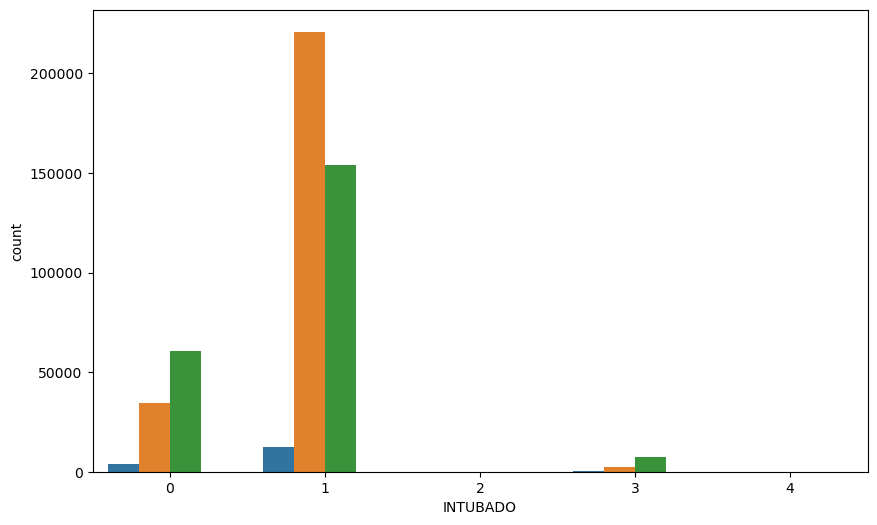

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='INTUBADO', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Intubado')
plt.xlabel('Intubado')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

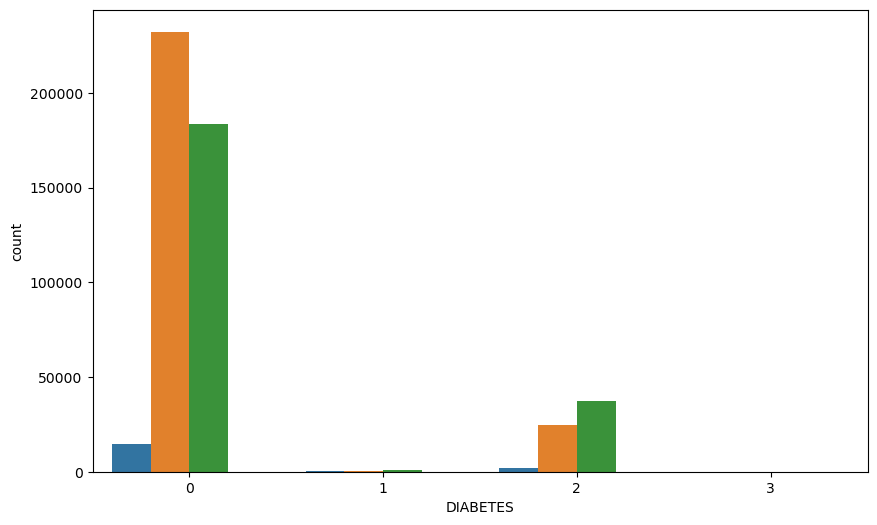

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DIABETES', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

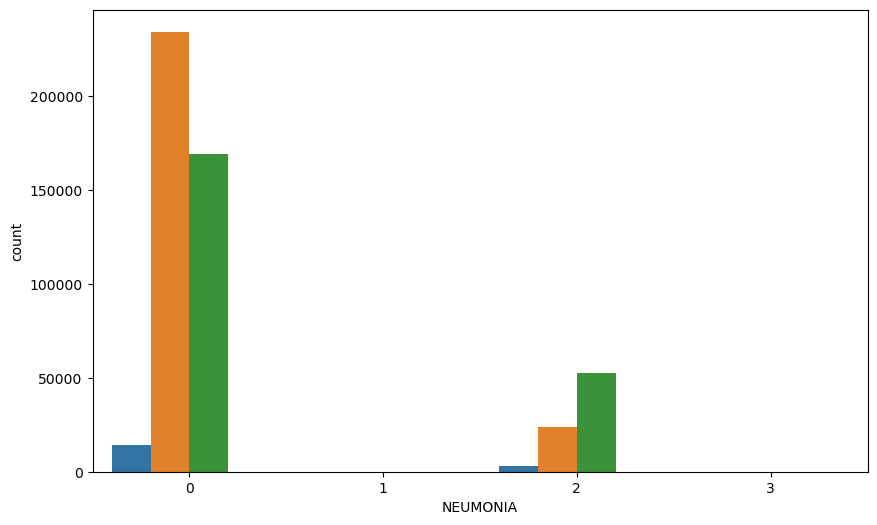

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NEUMONIA', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Neumonía')
plt.xlabel('Neumonía')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

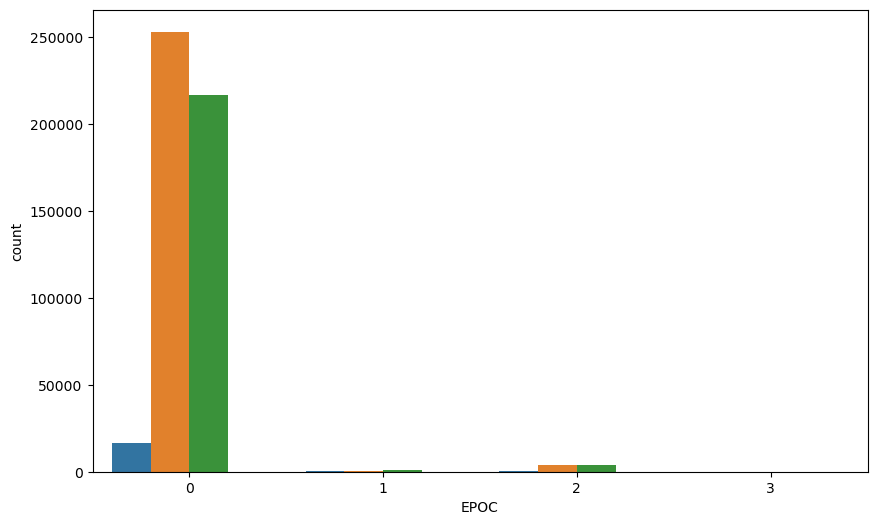

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EPOC', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Epoc')
plt.xlabel('Epoc')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

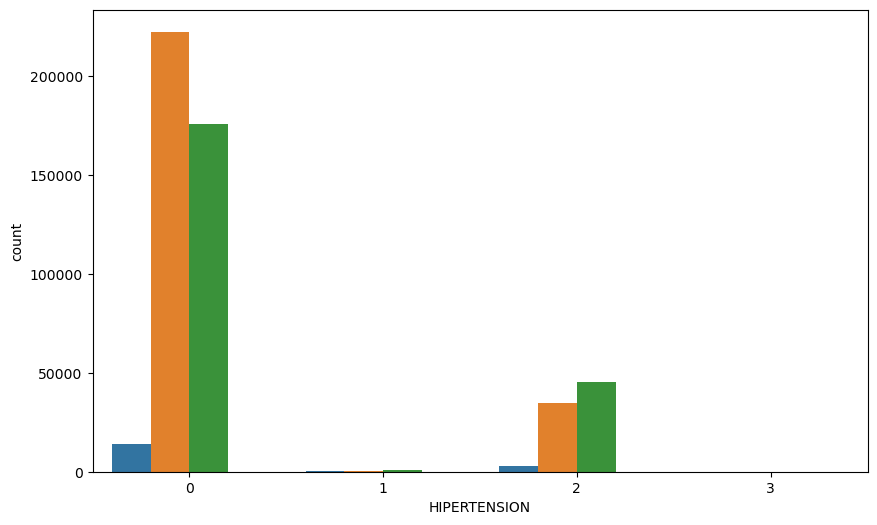

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HIPERTENSION', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Hipertension')
plt.xlabel('Hipertension')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

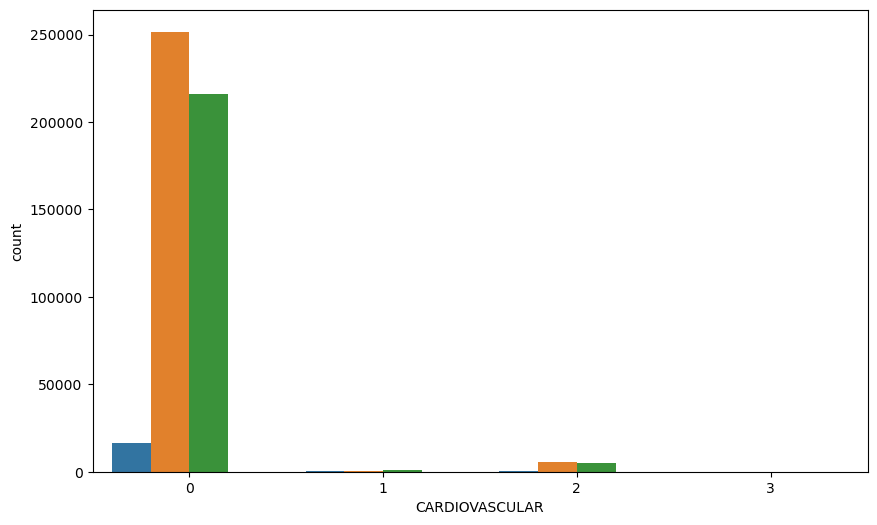

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CARDIOVASCULAR', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Cardiovascular')
plt.xlabel('Cardiovascular')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

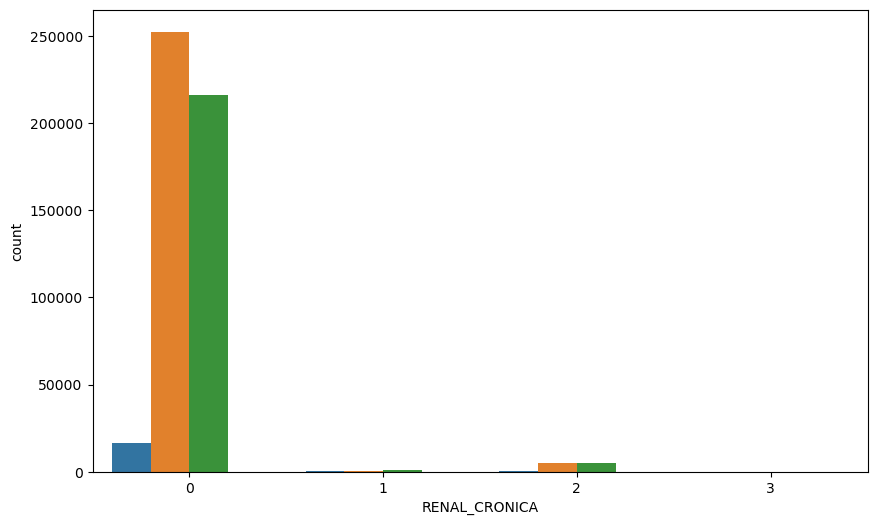

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RENAL_CRONICA', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Renal_cronica')
plt.xlabel('Renal_cronica')
plt.ylabel('Cantidad')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

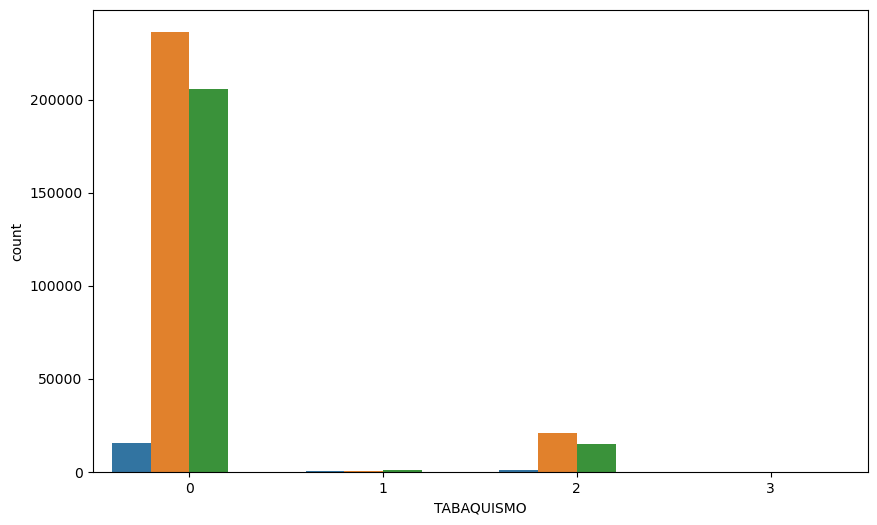

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TABAQUISMO', hue='RESULTADO', data=covid)
plt.title('Distribución de Resultados de COVID-19 según Tabaquismo')
plt.xlabel('Tabaquismo')
plt.ylabel('Cantidad')
plt.show()

## Arbol de Desiciones

In [78]:
train,test= train_test_split(covid, test_size= 0.3)

In [77]:
X_train= train[['NEUMONIA','FECHA_DEF','TIPO_PACIENTE','EDAD','UCI']]

Y_train= train[['RESULTADO']]


X_test= test[['NEUMONIA','FECHA_DEF','TIPO_PACIENTE','EDAD','UCI']]

Y_test= test[['RESULTADO']]

In [76]:
from sklearn import tree

[Text(0.5890688594372512, 0.9893617021276596, 'x[1] <= 157.0\ngini = 0.529\nsamples = 347513\nvalue = [11764, 180541, 155207, 1]'),
 Text(0.24867620875752527, 0.9680851063829787, 'x[0] <= 1.0\ngini = 0.347\nsamples = 27620\nvalue = [750, 5178, 21692, 0]'),
 Text(0.0651157821938626, 0.9468085106382979, 'x[3] <= 71.0\ngini = 0.446\nsamples = 7676\nvalue = [292, 2066, 5318, 0]'),
 Text(0.0029247894146820397, 0.925531914893617, 'x[3] <= 47.0\ngini = 0.495\nsamples = 291\nvalue = [6, 175, 110, 0]'),
 Text(0.0010447048204773666, 0.9042553191489362, 'x[2] <= 0.5\ngini = 0.415\nsamples = 96\nvalue = [2, 69, 25, 0]'),
 Text(0.0007374386968075529, 0.8829787234042553, 'x[1] <= 135.0\ngini = 0.497\nsamples = 13\nvalue = [0, 6, 7, 0]'),
 Text(0.0006145322473396275, 0.8617021276595744, 'x[1] <= 90.0\ngini = 0.463\nsamples = 11\nvalue = [0, 4, 7, 0]'),
 Text(0.000491625797871702, 0.8404255319148937, 'x[1] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5, 0]'),
 Text(0.00036871934840377647, 0.8191

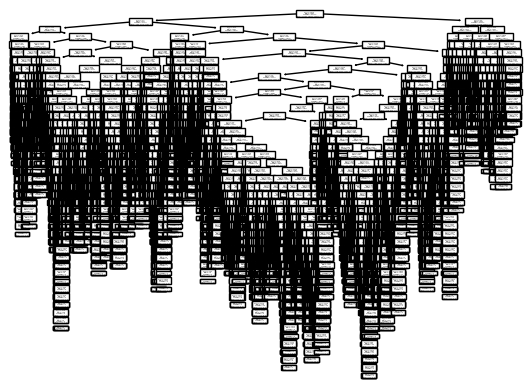

In [72]:
clf= tree.DecisionTreeClassifier()

clf= clf.fit(X_train, Y_train)

tree.plot_tree(clf)

In [79]:
covid.head()

,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,0,25,1,42,18,158,0,...,0,0,2,2,0,0,2,0,1,0
1,24,2,4,1,25,1,28,18,158,0,...,0,0,0,2,0,0,0,2,1,0
2,04b7a5,2,4,1,25,1,77,30,158,0,...,0,0,0,2,0,2,0,2,1,0
3,014c63,2,4,1,25,1,91,78,158,0,...,0,0,0,0,2,0,0,0,1,0
4,1aa52b,2,99,0,25,1,125,108,158,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
clf.score(X_train, Y_train)

0.6083283215304176

In [81]:
y_pred= clf.predict(X_test)

In [82]:
print("precision: ",clf.score(X_test,Y_test))

precision:  0.589982207003055


In [83]:
covid.head()

,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,0,25,1,42,18,158,0,...,0,0,2,2,0,0,2,0,1,0
1,24,2,4,1,25,1,28,18,158,0,...,0,0,0,2,0,0,0,2,1,0
2,04b7a5,2,4,1,25,1,77,30,158,0,...,0,0,0,2,0,2,0,2,1,0
3,014c63,2,4,1,25,1,91,78,158,0,...,0,0,0,0,2,0,0,0,1,0
4,1aa52b,2,99,0,25,1,125,108,158,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
covid["INTUBADO"].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
496443    1
496444    1
496445    1
496446    1
496447    4
Name: INTUBADO, Length: 496448, dtype: int32>

In [85]:
covid["NEUMONIA"].head

<bound method NDFrame.head of 0         2
1         0
2         2
3         2
4         2
         ..
496443    0
496444    0
496445    2
496446    0
496447    3
Name: NEUMONIA, Length: 496448, dtype: int32>

In [86]:
covid["EMBARAZO"].head

<bound method NDFrame.head of 0         1
1         0
2         0
3         0
4         1
         ..
496443    1
496444    1
496445    0
496446    1
496447    4
Name: EMBARAZO, Length: 496448, dtype: int32>

In [87]:
covid["DIABETES"].head

<bound method NDFrame.head of 0         0
1         0
2         2
3         2
4         0
         ..
496443    0
496444    0
496445    2
496446    0
496447    3
Name: DIABETES, Length: 496448, dtype: int32>

In [88]:
covid["EPOC"].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
496443    0
496444    0
496445    0
496446    0
496447    3
Name: EPOC, Length: 496448, dtype: int32>

In [89]:
covid["ASMA"].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
496443    0
496444    0
496445    0
496446    0
496447    3
Name: ASMA, Length: 496448, dtype: int32>

In [90]:
covid["INMUSUPR"].head

<bound method NDFrame.head of 0         2
1         0
2         0
3         0
4         0
         ..
496443    0
496444    0
496445    0
496446    0
496447    3
Name: INMUSUPR, Length: 496448, dtype: int32>

In [91]:
covid["HIPERTENSION"].head

<bound method NDFrame.head of 0         2
1         2
2         2
3         0
4         0
         ..
496443    0
496444    0
496445    2
496446    0
496447    3
Name: HIPERTENSION, Length: 496448, dtype: int32>

In [92]:
covid["CARDIOVASCULAR"].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         2
4         0
         ..
496443    0
496444    0
496445    0
496446    0
496447    3
Name: CARDIOVASCULAR, Length: 496448, dtype: int32>

In [93]:
covid["OBESIDAD"].head

<bound method NDFrame.head of 0         0
1         0
2         2
3         0
4         0
         ..
496443    0
496444    0
496445    2
496446    0
496447    3
Name: OBESIDAD, Length: 496448, dtype: int32>

In [94]:
covid["RENAL_CRONICA"].head

<bound method NDFrame.head of 0         2
1         0
2         0
3         0
4         0
         ..
496443    0
496444    0
496445    0
496446    0
496447    3
Name: RENAL_CRONICA, Length: 496448, dtype: int32>

In [95]:
covid["TABAQUISMO"].head

<bound method NDFrame.head of 0         0
1         2
2         2
3         0
4         0
         ..
496443    0
496444    0
496445    0
496446    0
496447    3
Name: TABAQUISMO, Length: 496448, dtype: int32>

In [97]:
covid.head()

,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,0,25,1,42,18,158,0,...,0,0,2,2,0,0,2,0,1,0
1,24,2,4,1,25,1,28,18,158,0,...,0,0,0,2,0,0,0,2,1,0
2,04b7a5,2,4,1,25,1,77,30,158,0,...,0,0,0,2,0,2,0,2,1,0
3,014c63,2,4,1,25,1,91,78,158,0,...,0,0,0,0,2,0,0,0,1,0
4,1aa52b,2,99,0,25,1,125,108,158,0,...,0,0,0,0,0,0,0,0,1,0


## Modelo de Regresion Logistica

In [100]:
covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv",  encoding="ISO-8859-1")
covid.head()

C:\Users\csrrf\AppData\Local\Temp\ipykernel_11932\3094307765.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  covid= pd.read_csv("20-06-30-COVID19MEXICO - codificado.csv",  encoding="ISO-8859-1")


,ID_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,113778,2,4,Hombre,Zacatecas,Hospitalizado,07/01/2020,04/01/2020,9999-99-99,No,...,No,No,Si,Si,No,No,Si,No,Negativo,No
1,24,2,4,Mujer,Zacatecas,Hospitalizado,05/01/2020,04/01/2020,9999-99-99,No,...,No,No,No,Si,No,No,No,Si,Negativo,No
2,04b7a5,2,4,Mujer,Zacatecas,Hospitalizado,12/01/2020,06/01/2020,9999-99-99,No,...,No,No,No,Si,No,Si,No,Si,Negativo,No
3,014c63,2,4,Mujer,Zacatecas,Hospitalizado,14/01/2020,14/01/2020,9999-99-99,No,...,No,No,No,No,Si,No,No,No,Negativo,No
4,1aa52b,2,99,Hombre,Zacatecas,Hospitalizado,19/01/2020,19/01/2020,9999-99-99,No,...,No,No,No,No,No,No,No,No,Negativo,No


In [ ]:
from sklearn.model_selection import train_test_split
model_columns = ['ID_REGISTRO', 'ORIGEN', 'SECTOR']
covid_train, df_test = train_test_split(df, test_size=0.4, random_state=23)
X_train = df_train[model_columns]
X_test = df_test[model_columns]

y_train = df_train.repaid
y_test = df_test.repaid

In [104]:
model_columns=['HIPERTENSION','FECHA_DEF','ORIGEN','TABAQUISMO','ENTIDAD_NAC']

covid_train, covid_test= train_test_split(covid, test_size=0.4, random_state=23)

X_train= covid_train[model_columns]
X_test= covid_test[model_columns]

Y_train= covid_train['RESULTADO']
Y_test= covid_test['RESULTADO']

In [109]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0)
clf1.fit(X_train, Y_train)

ValueError: could not convert string to float: 'No'

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf1 = LogisticRegression()
clf1.fit(X_train, Y_train, check_y_params={"ensure_2d": True})


NameError: name 'X' is not defined

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf1 = LogisticRegression()
clf1.fit(X_train, Y_train, check_y_params={"ensure_2d": False})


NameError: name 'X' is not defined